<a href="https://colab.research.google.com/github/douglascosta01/Redes-Neurais/blob/main/Rede_Neural_SOM_(Self_Organizing_Maps).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalação do MiniSOM**

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10608 sha256=0daac6c3c17889453fb301b1a48ae3eb77e9e86ff17643a39ed010378f317d34
  Stored in directory: /root/.cache/pip/wheels/7b/fd/40/c318df5c7fa3b276930ab30fed7306b603007e9b24d5479958
Successfully built minisom


**Importação do pacote MiniSom**

In [ ]:
from minisom import MiniSom

In [ ]:
# gerando uma rede SOM
som = MiniSom(10, 10, 5, sigma=0.3, learning_rate=0.5)

**Importação dos pacotes**

In [ ]:
from minisom import MiniSom
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

**Carga dos Dados**

In [ ]:
dados = sklearn.datasets.load_iris()
df = pd.DataFrame(dados.data, columns = dados.feature_names)
df['label'] = [dados.target_names[i] for i in dados.target]
# sns.pairplot(df, hue = 'label')

In [ ]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

In [ ]:
x = df.drop(['label'], axis=1)

# normalizando os dados (MinMax)
# normalizador = MinMaxScaler ()
# x_norm = pd,DataFrame(normalizador.fit_transform(x), columns=x.columns)

labels = df.label.unique()

# transformando dados categóricos em dados numéricos
df['label'].replace(df['label'].unique(), [0,1,2], inplace=True)
target = df['label'].values
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

Text(0.5, 1.0, 'Mapa de Correlação de Atributos')

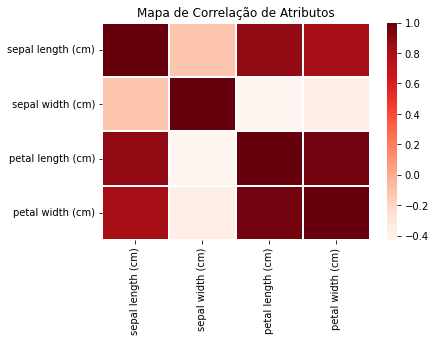

In [ ]:
sns.heatmap(x.astype(float).corr(), linewidths= 0.1, linecolor = 'white', cmap='Reds')
plt.title('Mapa de Correlação de Atributos')


**MODELO 01 (7X5)**

Parâmetros do Modelo

In [ ]:
sigma = 5
eta = 0.1
epocas = 500
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 7 # número de neurônios ( dimensão 01 - linhas)
neuD2 = 5 # número de neurônios (dimensão 02 - colunas)

/usr/local/lib/python3.8/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


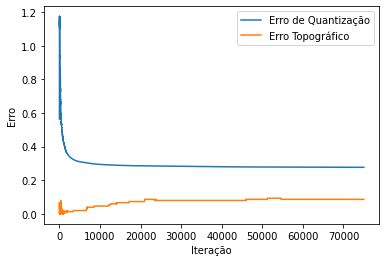

In [ ]:
som = MiniSom(neuD1, neuD2, x.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)

som.random_weights_init(x.values)
som.train_random(x.values, epocas)

q_error = []
t_error = []

for i in range(epocas*len(x.values)):
  rand_i = np.random.randint(len(x.values))
  som.update(x.values[rand_i], som.winner(x.values[rand_i]), i, epocas)
  q_error.append(som.quantization_error(x.values))
  t_error.append(som.topographic_error(x.values))

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro de Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()


Algumas Medidas de Qualidade

In [1]:
# Erro de Quantização
som.quantzation_error(x_values) 

NameError: ignored